In [1]:
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

#Hierarchical Clustering

In [2]:
uploaded = files.upload()

Saving crime_data.csv to crime_data.csv


In [3]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.corr()

<ipython-input-4-b39468a0c487>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crime.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [5]:
import seaborn as sns

<Axes: >

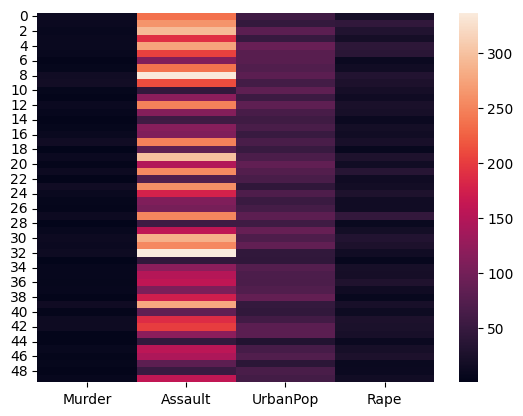

In [6]:
sns.heatmap(data=crime.iloc[:,1:])

In [7]:
x=crime.iloc[:,1:]
x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=scaler.fit_transform(x)
df_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

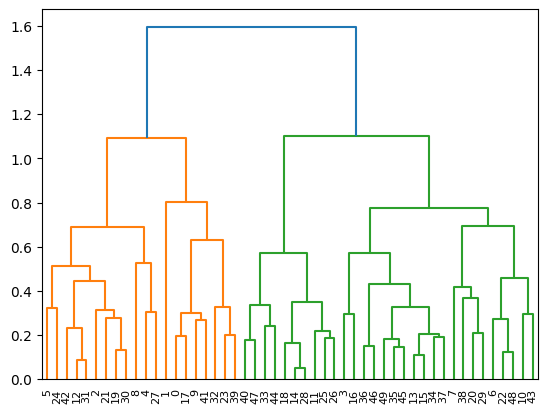

In [13]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [14]:
df=pd.DataFrame()
linkages=['single','complete','average','ward']
for i,linkages in enumerate(linkages):
  model=AgglomerativeClustering(n_clusters=5,linkage=linkages)
  labels=model.fit_predict(df_norm)
  print(f'labels:{labels},linkages:{linkages}')
  crime[f'labels_{linkages}']=labels
crime.head()

labels:[0 3 0 0 0 4 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0],linkages:single
labels:[3 4 1 0 1 1 0 0 1 3 0 2 1 0 2 0 0 3 2 1 0 1 0 3 1 2 2 1 2 0 1 1 3 2 0 0 0
 0 0 3 2 3 1 0 2 0 0 2 0 0],linkages:complete
labels:[3 2 1 0 1 1 0 0 1 3 0 4 1 0 4 0 0 3 4 1 0 1 4 3 1 4 4 1 4 0 1 1 3 4 0 0 0
 0 0 3 4 3 1 0 4 0 0 4 4 0],linkages:average
labels:[3 0 0 4 0 0 1 1 0 3 1 2 0 4 2 4 4 3 2 0 1 0 2 3 0 2 2 0 2 1 0 0 3 2 4 4 1
 4 1 3 2 3 0 1 2 4 1 2 2 4],linkages:ward


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels_single,labels_complete,labels_average,labels_ward
0,Alabama,13.2,236,58,21.2,0,3,3,3
1,Alaska,10.0,263,48,44.5,3,4,2,0
2,Arizona,8.1,294,80,31.0,0,1,1,0
3,Arkansas,8.8,190,50,19.5,0,0,0,4
4,California,9.0,276,91,40.6,0,1,1,0


HYPERPARAMETER--> SINGLE

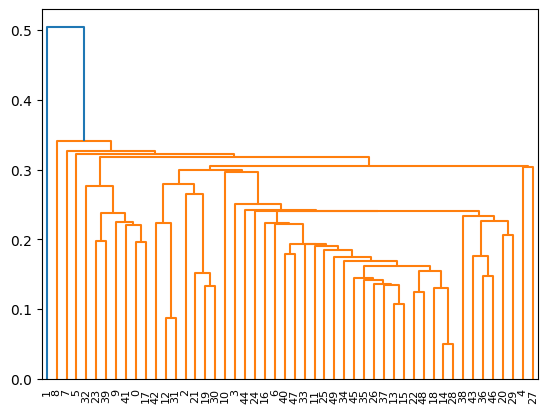

In [15]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))

In [16]:
crime.iloc[:,[0,6]]

,Unnamed: 0,labels_complete
0,Alabama,3
1,Alaska,4
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,0
8,Florida,1
9,Georgia,3


In [17]:
crime.groupby('labels_single').mean()

<ipython-input-17-367104f00d9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby('labels_single').mean()


,Murder,Assault,UrbanPop,Rape,labels_complete,labels_average,labels_ward
labels_single,,,,,,,
0,7.613043,163.0,65.195652,20.232609,1.108696,1.717391,1.934783
1,5.900000,238.0,72.000000,15.800000,0.000000,0.000000,1.000000
2,15.400000,335.0,80.000000,31.900000,1.000000,1.000000,0.000000
3,10.000000,263.0,48.000000,44.500000,4.000000,2.000000,0.000000
4,7.900000,204.0,78.000000,38.700000,1.000000,1.000000,0.000000


HYPERPARAMETER-->COMPLETE

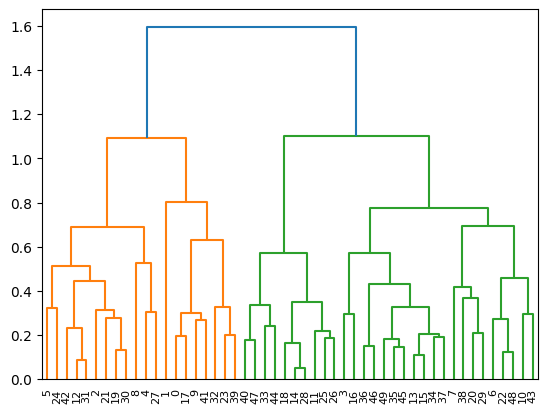

In [18]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

In [19]:
crime.iloc[:,[0,7]]

,Unnamed: 0,labels_average
0,Alabama,3
1,Alaska,2
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,0
8,Florida,1
9,Georgia,3


In [20]:
crime.groupby(crime['labels_complete']).mean()

<ipython-input-20-6f8979ce6769>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby(crime['labels_complete']).mean()


,Murder,Assault,UrbanPop,Rape,labels_single,labels_average,labels_ward
labels_complete,,,,,,,
0,5.715000,132.300000,70.800000,18.100000,0.05,0.4,2.45
1,10.883333,256.916667,78.333333,32.250000,0.50,1.0,0.00
2,3.180000,78.700000,49.300000,11.630000,0.00,4.0,2.00
3,14.671429,251.285714,54.285714,21.685714,0.00,3.0,3.00
4,10.000000,263.000000,48.000000,44.500000,3.00,2.0,0.00


HYPERPARAMETER-->AVERAGE

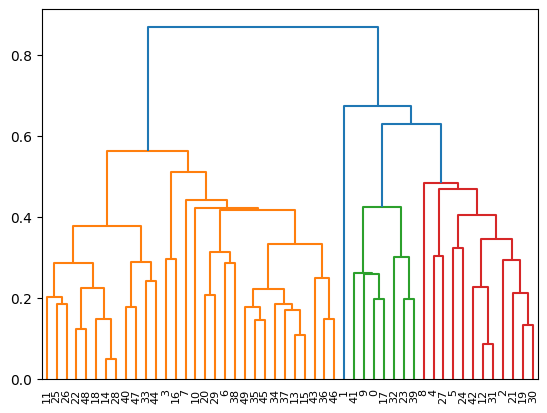

In [21]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [22]:
crime.iloc[:,[0,8]]

,Unnamed: 0,labels_ward
0,Alabama,3
1,Alaska,0
2,Arizona,0
3,Arkansas,4
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,3


In [23]:
crime.groupby(crime['labels_average']).mean()

<ipython-input-23-327026003c79>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby(crime['labels_average']).mean()


,Murder,Assault,UrbanPop,Rape,labels_single,labels_complete,labels_ward
labels_average,,,,,,,
0,6.055556,140.055556,71.333333,18.683333,0.055556,0.000000,2.5
1,10.883333,256.916667,78.333333,32.250000,0.500000,1.000000,0.0
2,10.000000,263.000000,48.000000,44.500000,3.000000,4.000000,0.0
3,14.671429,251.285714,54.285714,21.685714,0.000000,3.000000,3.0
4,3.091667,76.000000,52.083333,11.833333,0.000000,1.666667,2.0


HYPERPARAMETER-->WARD

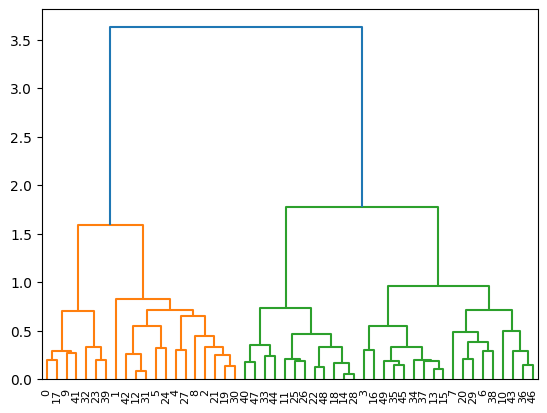

In [24]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [25]:
crime.iloc[:,[0,5]]

,Unnamed: 0,labels_single
0,Alabama,0
1,Alaska,3
2,Arizona,0
3,Arkansas,0
4,California,0
5,Colorado,4
6,Connecticut,0
7,Delaware,1
8,Florida,2
9,Georgia,0


In [26]:
crime.groupby(crime['labels_ward']).mean()

<ipython-input-26-db5a03fa4b64>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  crime.groupby(crime['labels_ward']).mean()


,Murder,Assault,UrbanPop,Rape,labels_single,labels_complete,labels_average
labels_ward,,,,,,,
0,10.815385,257.384615,76.000000,33.192308,0.692308,1.230769,1.076923
1,4.644444,144.444444,79.222222,18.766667,0.111111,0.000000,0.000000
2,3.091667,76.000000,52.083333,11.833333,0.000000,1.666667,4.000000
3,14.671429,251.285714,54.285714,21.685714,0.000000,3.000000,3.000000
4,7.466667,135.666667,63.444444,18.600000,0.000000,0.000000,0.000000


#KMEANS

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,DBSCAN

In [28]:
uploaded = files.upload()

Saving crime_data.csv to crime_data (1).csv


In [33]:
data=pd.read_csv('crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


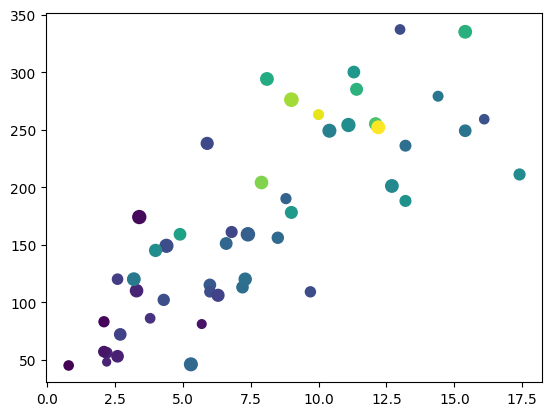

In [34]:
plt.scatter(data['Murder'],data['Assault'],data['UrbanPop'],data['Rape'])

In [35]:
data.corr()

<ipython-input-35-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [36]:
x=data.iloc[:,1:]

In [37]:
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(x)

In [38]:
scaled_df

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [39]:
kmeans=KMeans(n_clusters=2)
kmeans

KMeans(n_clusters=2)

In [40]:
labels=kmeans.fit_predict(x)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

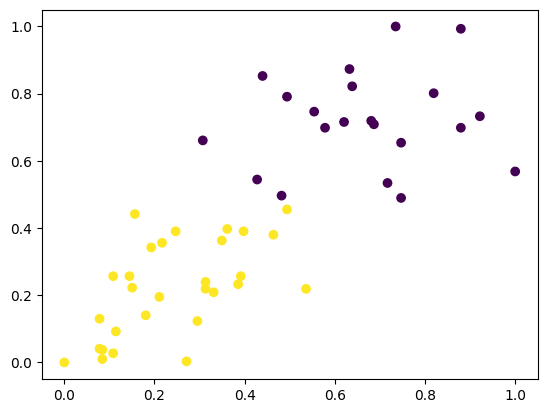

In [41]:
plt.scatter(scaled_df[:,0],scaled_df[:,1],c=labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

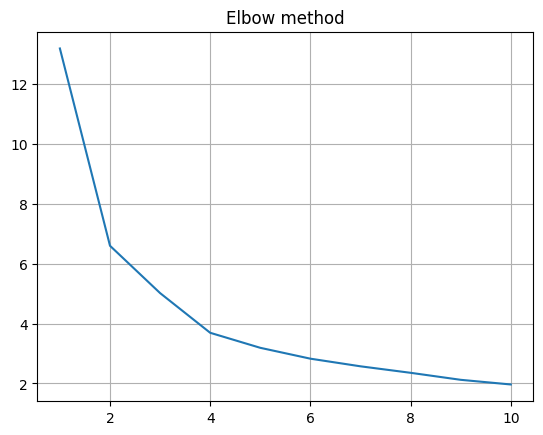

In [42]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=200)
  kmeans.fit_predict(scaled_df)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.grid(True)

In [43]:
kmeans=KMeans(n_clusters=4,random_state=200)
labesls=kmeans.fit_predict(x)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

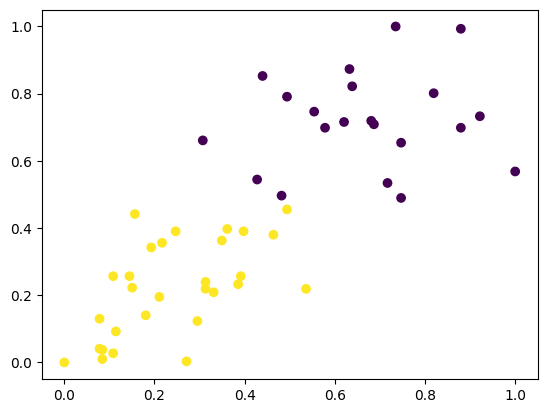

In [44]:
plt.scatter(scaled_df[:,0],scaled_df[:,1],c=labels)

In [45]:
data['cluster_minmax']=labels

In [46]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_minmax
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [47]:
data.groupby(data['cluster_minmax']).mean()

<ipython-input-47-9e5530bb5416>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data['cluster_minmax']).mean()


,Murder,Assault,UrbanPop,Rape
cluster_minmax,,,,
0,11.857143,255.000000,67.619048,28.114286
1,4.841379,109.758621,64.034483,16.248276


cluster 1 has the highest mean value for the murder,Assault and Rape,which means it contains the data points with the **most violent crimes**

-->cluster 0 has the least mean value for the murder,Assault,UrbanPop,Rape,which means it contains the data
points with the least violent cases

#DBSCAN

In [48]:
upload=files.upload()

Saving crime_data.csv to crime_data (2).csv


In [49]:
data=pd.read_csv('crime_data.csv')

In [50]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
x=data.iloc[:,1:]
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [54]:
db=DBSCAN(eps=1,min_samples=4)
db.fit_predict(X)

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [55]:
db.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [56]:
data['cluster']=db.labels_
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [57]:
data[data['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
17,Louisiana,15.4,249,66,22.2,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [58]:
data[data['cluster']==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,1
11,Idaho,2.6,120,54,14.2,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
20,Massachusetts,4.4,149,85,16.3,1
22,Minnesota,2.7,72,66,14.9,1
24,Missouri,9.0,178,70,28.2,1


In [59]:
data.groupby(data['cluster']).mean()

<ipython-input-59-ba2177add1a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data['cluster']).mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
-1,11.005556,247.166667,70.666667,28.766667
0,14.050000,238.000000,57.750000,23.200000
1,4.825000,112.035714,63.357143,16.107143
